In [ ]:
from Bio import SeqIO
import pandas as pd

codon_df = pd.read_csv("codons.csv")
codon_abundance = {x:0 for x in codon_df["codon"]}

for CDS in SeqIO.parse("cds_from_genomic.fna","fasta"):

    for i in range(round(len(CDS.seq)/3)):
        seq_codon = CDS.seq[i*3:(i+1)*3]
        codon_abundance[seq_codon] += 1

In [5]:
codon_df = pd.read_csv("codons.csv")
codon_df

,aminoacid,codon
0,A,GCA
1,A,GCC
2,A,GCG
3,A,GCT
4,C,TGC
...,...,...
59,V,GTG
60,V,GTT
61,W,TGG
62,Y,TAC


In [8]:
from Bio import SeqIO
import pandas as pd

def aa_codon_seq(aa,CDS):
    codon_df = pd.read_csv("codons.csv")
    aa_codons = codon_df[codon_df["aminoacid"] == aa]["codon"].to_list()

    codon_seq = list()

    for CDS in SeqIO.parse(CDS,"fasta"):
        codon_seq += [str(CDS.seq[i*3:(i+1)*3]) for i in range(round(len(CDS.seq)/3)) if CDS.seq[i*3:(i+1)*3] in aa_codons]

    return codon_seq

print(aa_codon_seq("T","cds_from_genomic.fna"))

['ACC', 'ACC', 'ACC', 'ACC', 'ACC', 'ACC', 'ACC', 'ACA', 'ACA', 'ACC', 'ACC', 'ACC', 'ACG', 'ACT', 'ACT', 'ACC', 'ACC', 'ACC', 'ACG', 'ACC', 'ACC', 'ACC', 'ACC', 'ACG', 'ACG', 'ACG', 'ACC', 'ACC', 'ACT', 'ACT', 'ACC', 'ACC', 'ACT', 'ACG', 'ACC', 'ACC', 'ACC', 'ACG', 'ACC', 'ACG', 'ACA', 'ACC', 'ACA', 'ACG', 'ACA', 'ACC', 'ACT', 'ACG', 'ACC', 'ACC', 'ACG', 'ACC', 'ACT', 'ACC', 'ACG', 'ACC', 'ACC', 'ACC', 'ACC', 'ACC', 'ACA', 'ACT', 'ACG', 'ACG', 'ACC', 'ACC', 'ACT', 'ACG', 'ACC', 'ACG', 'ACA', 'ACT', 'ACC', 'ACG', 'ACG', 'ACG', 'ACC', 'ACC', 'ACG', 'ACG', 'ACG', 'ACG', 'ACG', 'ACC', 'ACC', 'ACC', 'ACC', 'ACT', 'ACT', 'ACC', 'ACC', 'ACC', 'ACC', 'ACC', 'ACA', 'ACT', 'ACT', 'ACC', 'ACC', 'ACT', 'ACG', 'ACC', 'ACG', 'ACA', 'ACC', 'ACC', 'ACC', 'ACG', 'ACC', 'ACC', 'ACC', 'ACC', 'ACG', 'ACC', 'ACC', 'ACC', 'ACT', 'ACA', 'ACC', 'ACC', 'ACT', 'ACC', 'ACC', 'ACC', 'ACC', 'ACC', 'ACC', 'ACC', 'ACT', 'ACT', 'ACA', 'ACC', 'ACG', 'ACC', 'ACG', 'ACC', 'ACG', 'ACT', 'ACG', 'ACG', 'ACT', 'ACG', 'ACG'

In [11]:
import numpy as np
from numpy import linalg as lg

Eigenvalues, Eigenvectors = lg.eig(np.array([

[1, 3],

[2, 5]


]))

Lambda = np.diag(Eigenvalues)
Eigenvectors @ Lambda @ lg.inv(Eigenvectors)

array([[1., 3.],
       [2., 5.]])

In [ ]:
def MinMaxNorm(d):
    return {k: (v - min(d.values())) / (max(d.values()) - min(d.values())) for k, v in d.items()}

In [30]:
display_dict = MinMaxNorm(codon_abundance)
print(display_dict)


{'GCA': 0.37692080170143244, 'GCC': 0.4804293018211524, 'GCG': 0.6366427696164735, 'GCT': 0.28424344004845137, 'TGC': 0.11753686671643263, 'TGT': 0.09238158283919491, 'GAC': 0.35796278820828464, 'GAT': 0.6019521401709883, 'GAA': 0.7467992506936717, 'GAG': 0.33225820081972984, 'TTC': 0.3087789968872801, 'TTT': 0.4159917745320357, 'GGA': 0.14346680939168158, 'GGC': 0.5592332286370231, 'GGG': 0.20304511331145508, 'GGT': 0.46507697291511146, 'CAC': 0.1791997070381273, 'CAT': 0.23832730038451247, 'ATA': 0.07445175284158932, 'ATC': 0.4732038479415203, 'ATT': 0.5719094635135706, 'AAA': 0.6323046803476106, 'AAG': 0.18901674671474247, 'CTA': 0.06897280243383709, 'CTC': 0.20628459555768391, 'CTG': 1.0, 'CTT': 0.2031296215439654, 'TTA': 0.25632755390920997, 'TTG': 0.2534542740038592, 'ATG': 0.5223172157354329, 'AAC': 0.4047803490190003, 'AAT': 0.3265116410090283, 'CCA': 0.15448104902885956, 'CCC': 0.09839575205284581, 'CCG': 0.43716108677587007, 'CCT': 0.12679051817631234, 'CAA': 0.28622938351244

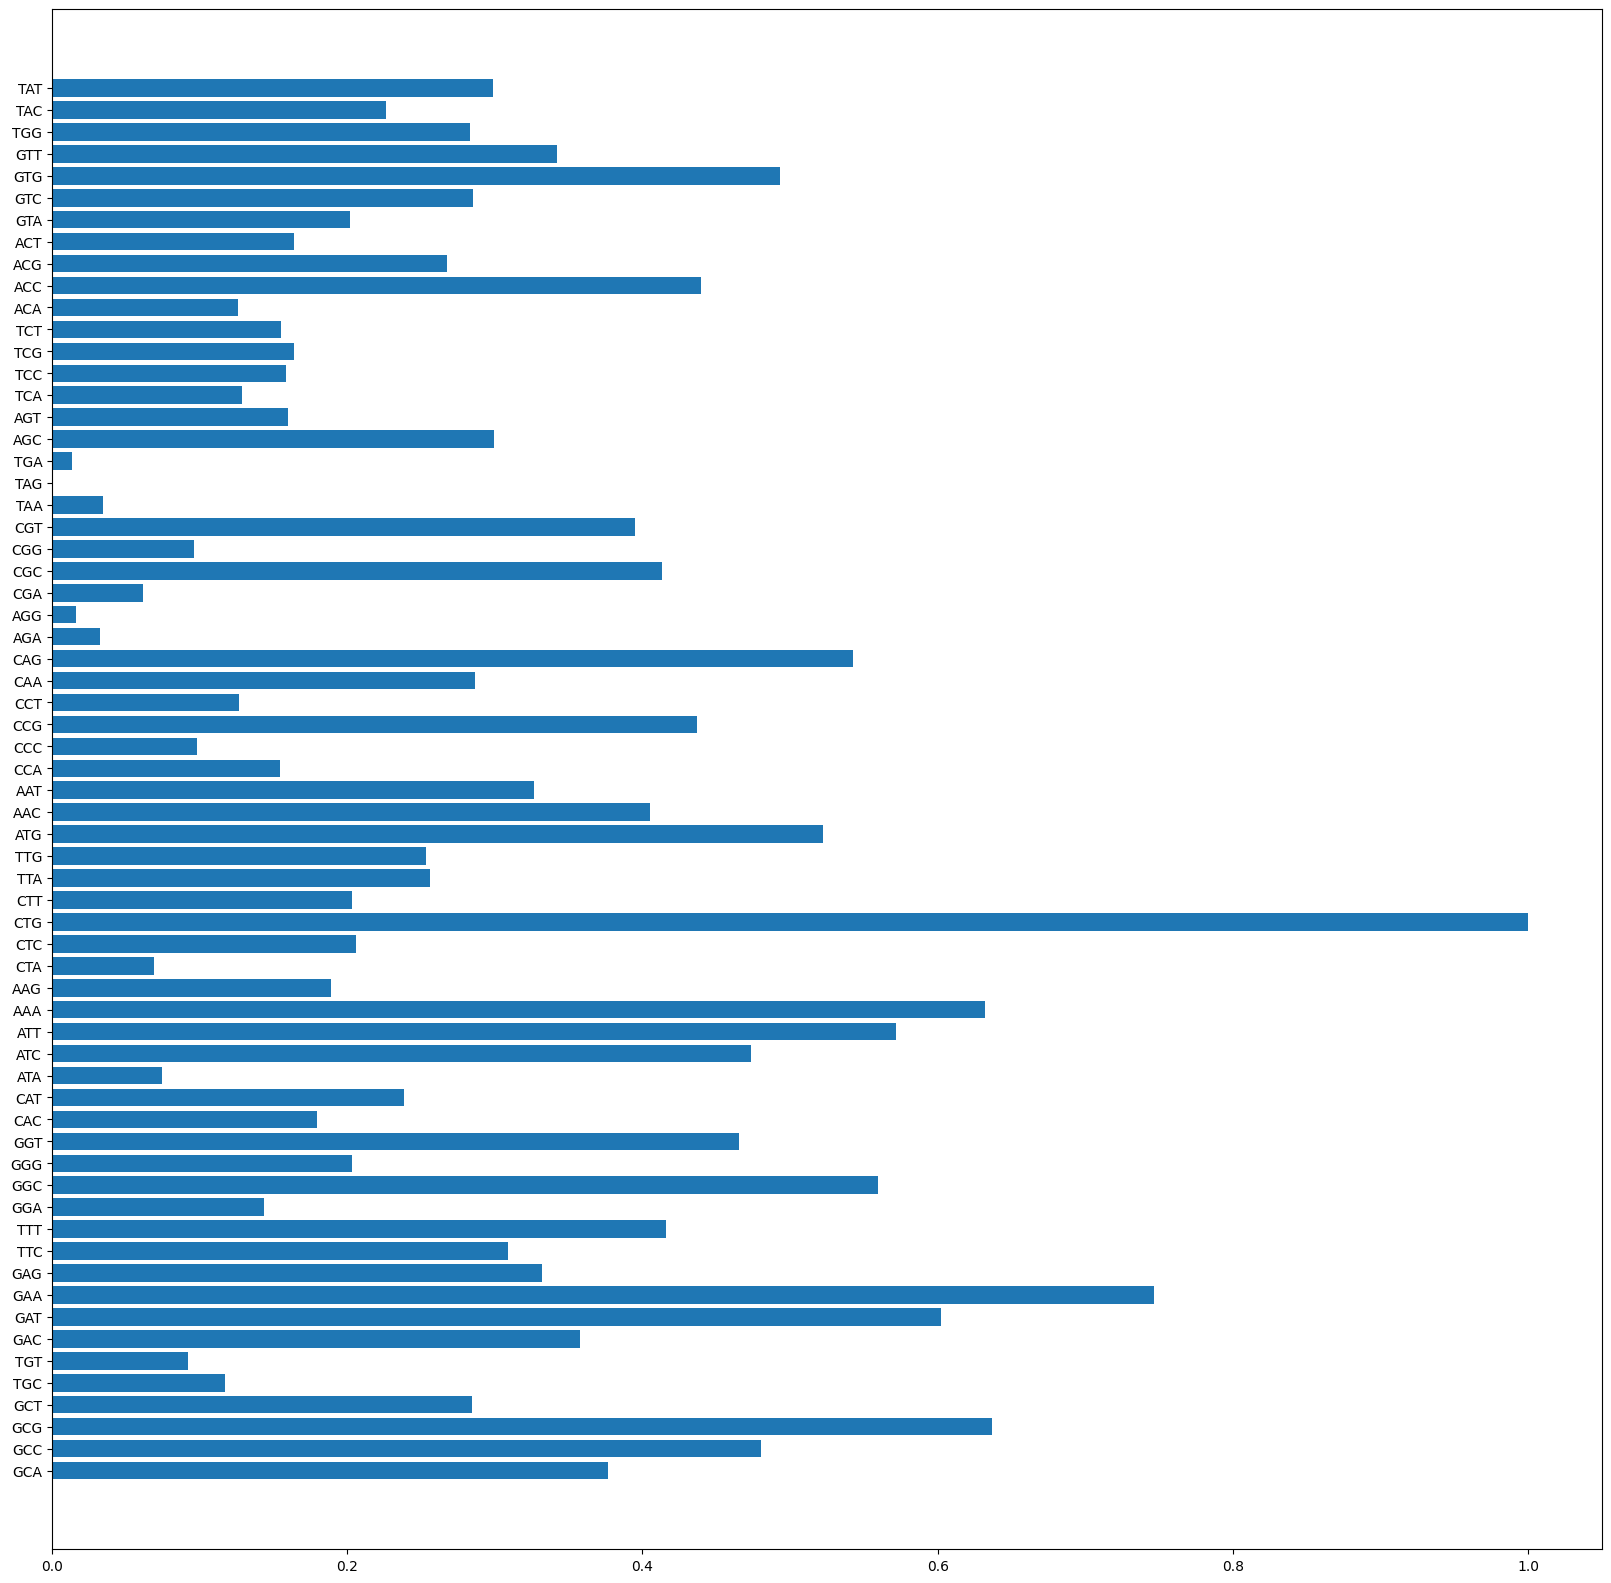

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.barh(display_dict.keys(), display_dict.values())
plt.show()